In [294]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [295]:
# import data which is already filtered using the 01_filter_data.ipynb file
df = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/Data-Analysis-2/main/data/loan_data.csv')

# import political affiliation of states data
df_states = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/Data-Analysis-2/main/data/state_affiliation.csv',sep=';',header=None)

In [296]:
df_states.head()

,0,1,2
0,Alabama,R,
1,Alaska,I,NaN
2,Arizona,R,NaN
3,Arkansas,R,NaN
4,California,D,NaN


In [297]:
# correct mistake in csv (drop empty column)
df_states.dropna(inplace=True,axis=1)

# rename columns
df_states.columns = ['geo_name','affiliation']

# merge dataframes
df = df.merge(df_states,on='geo_name')

---
# 00. EDA
--- 

In [298]:
df.head()

,geo_name,geo_level,race_or_ethnicity,gender,veteran,number_of_loans,loan_amount,quartiles_number_of_loans,quartiles_loan_amount,percentile_number_of_loans,percentile_loan_amount,pct_black_alone,affiliation
0,Montana,state,Hispanic,Female Owned,Veteran,8,376256,Bottom 25% of geographies,26-50% of geographies,22,30,0.6,D
1,Montana,state,Hispanic,Female Owned,Non-Veteran,96,2776646,Bottom 25% of geographies,Bottom 25% of geographies,12,10,0.6,D
2,Montana,state,White,Female Owned,Non-Veteran,2546,97370815,26-50% of geographies,Bottom 25% of geographies,30,22,0.6,D
3,Montana,state,White,Female Owned,Veteran,116,3037589,26-50% of geographies,Bottom 25% of geographies,28,18,0.6,D
4,Montana,state,Asian,Female Owned,Veteran,1,95000,Bottom 25% of geographies,Bottom 25% of geographies,0,19,0.6,D


In [299]:
print(f"I have {df.shape[0]} rows and {df.shape[1]} columns in my dataset.")

I have 807 rows and 13 columns in my dataset.


In [300]:
# look at columns
df.columns

Index(['geo_name', 'geo_level', 'race_or_ethnicity', 'gender', 'veteran',
       'number_of_loans', 'loan_amount', 'quartiles_number_of_loans',
       'quartiles_loan_amount', 'percentile_number_of_loans',
       'percentile_loan_amount', 'pct_black_alone', 'affiliation'],
      dtype='object')

In [301]:
# look at null values
df.isnull().sum()

geo_name                      0
geo_level                     0
race_or_ethnicity             0
gender                        0
veteran                       0
number_of_loans               0
loan_amount                   0
quartiles_number_of_loans     0
quartiles_loan_amount         0
percentile_number_of_loans    0
percentile_loan_amount        0
pct_black_alone               0
affiliation                   0
dtype: int64

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 0 to 806
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   geo_name                    807 non-null    object 
 1   geo_level                   807 non-null    object 
 2   race_or_ethnicity           807 non-null    object 
 3   gender                      807 non-null    object 
 4   veteran                     807 non-null    object 
 5   number_of_loans             807 non-null    int64  
 6   loan_amount                 807 non-null    int64  
 7   quartiles_number_of_loans   807 non-null    object 
 8   quartiles_loan_amount       807 non-null    object 
 9   percentile_number_of_loans  807 non-null    int64  
 10  percentile_loan_amount      807 non-null    int64  
 11  pct_black_alone             807 non-null    float64
 12  affiliation                 807 non-null    object 
dtypes: float64(1), int64(4), object(8)


In [303]:
# look at value counts for each column
for col in df.columns:
    print(df[col].value_counts())
    print('-------------------')

Montana                 16
North Carolina          16
Kentucky                16
South Carolina          16
New Mexico              16
Hawaii                  16
Colorado                16
Florida                 16
New Jersey              16
Alabama                 16
Georgia                 16
California              16
Washington              16
Pennsylvania            16
Massachusetts           16
New York                16
Ohio                    16
Oregon                  16
Mississippi             16
Illinois                16
West Virginia           16
Indiana                 16
Arkansas                16
Arizona                 16
Tennessee               16
Nevada                  16
South Dakota            16
Nebraska                16
Louisiana               16
Kansas                  16
Connecticut             16
Idaho                   16
Michigan                16
Virginia                16
Utah                    16
Maryland                16
District of Columbia    16
T

In [304]:
# look at the unique values of each column
for col in df.columns:
    print(col, df[col].nunique())

geo_name 51
geo_level 1
race_or_ethnicity 4
gender 2
veteran 2
number_of_loans 577
loan_amount 807
quartiles_number_of_loans 4
quartiles_loan_amount 4
percentile_number_of_loans 90
percentile_loan_amount 91
pct_black_alone 49
affiliation 3


In [305]:
df.describe()

,number_of_loans,loan_amount,percentile_number_of_loans,percentile_loan_amount,pct_black_alone
count,807.000000,8.070000e+02,807.000000,807.000000,807.000000
mean,3014.047088,1.625656e+08,49.784387,50.000000,11.270012
std,7259.171822,5.263416e+08,29.641708,29.477333,10.408518
min,1.000000,3.010000e+02,0.000000,0.000000,0.600000
25%,53.500000,1.992810e+06,24.000000,24.000000,3.400000
50%,339.000000,1.562447e+07,50.000000,50.000000,7.300000
75%,1949.500000,9.952855e+07,76.000000,76.000000,15.200000
max,73256.000000,8.835301e+09,100.000000,100.000000,44.700000


## Look at loan amount as our dependant variable

In [306]:
# Log transform the loan_amount column
df['log_loan_amount'] = df['loan_amount'].apply(lambda x: np.log(x))

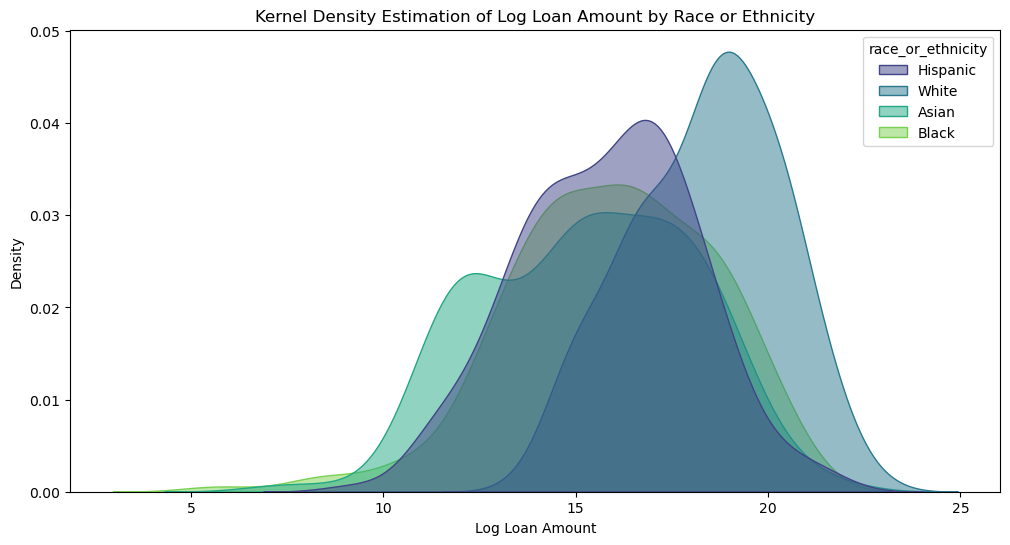

In [307]:
# Setting up the figure
plt.figure(figsize=(12, 6))

# Create the KDE plot
sns.kdeplot(data=df, x='log_loan_amount', hue='race_or_ethnicity', 
            palette='viridis',  # Color palette
            fill=True,  # Fill the area under the curve
            alpha=0.5)  # transparency

# Set labels and title
plt.xlabel('Log Loan Amount')
plt.title('Kernel Density Estimation of Log Loan Amount by Race or Ethnicity')

# Show the plot
plt.show()

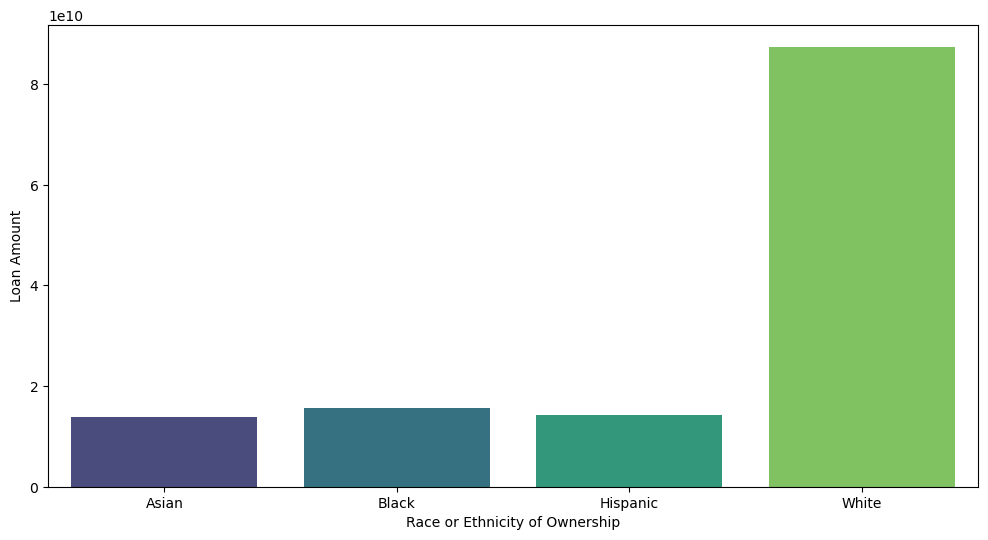

In [308]:
by_ethnicity = df.groupby(by='race_or_ethnicity').aggregate({'loan_amount': ['sum']}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=by_ethnicity,x='race_or_ethnicity',y=('loan_amount','sum'),palette='viridis')

plt.xlabel('Race or Ethnicity of Ownership')
plt.ylabel('Loan Amount')

plt.show()

In [309]:
# Assumption from EDA and research question: Businesses with white ownership are more likely to get a loan than businesses with other ethnic ownerships.

## Look at controlling variables

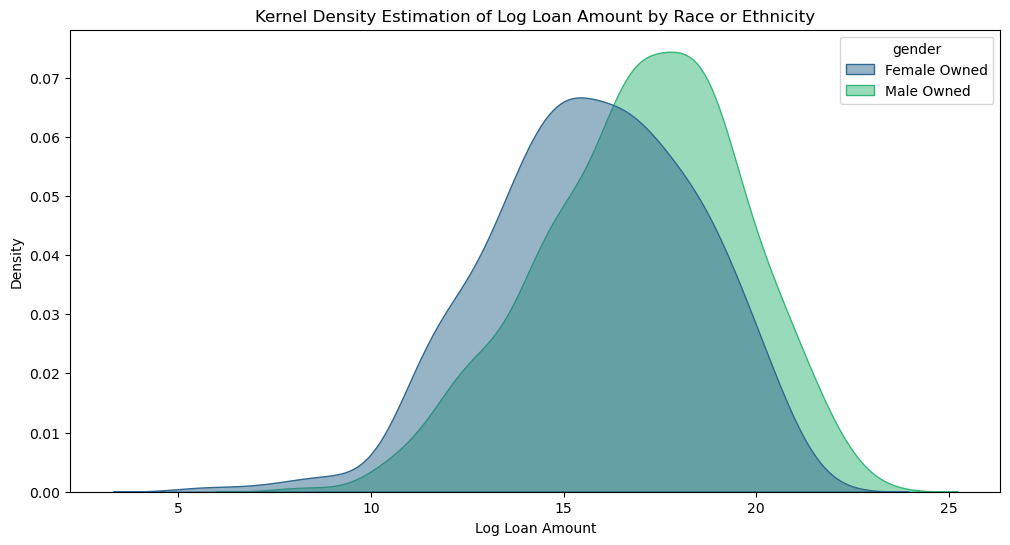

In [310]:
# Setting up the figure
plt.figure(figsize=(12, 6))

# Create the KDE plot
sns.kdeplot(data=df, x='log_loan_amount', hue='gender',
            palette='viridis',  # Color palette
            fill=True,  # Fill the area under the curve
            alpha=0.5)  # transparency

# Set labels and title
plt.xlabel('Log Loan Amount')
plt.title('Kernel Density Estimation of Log Loan Amount by Race or Ethnicity')

# Show the plot
plt.show()

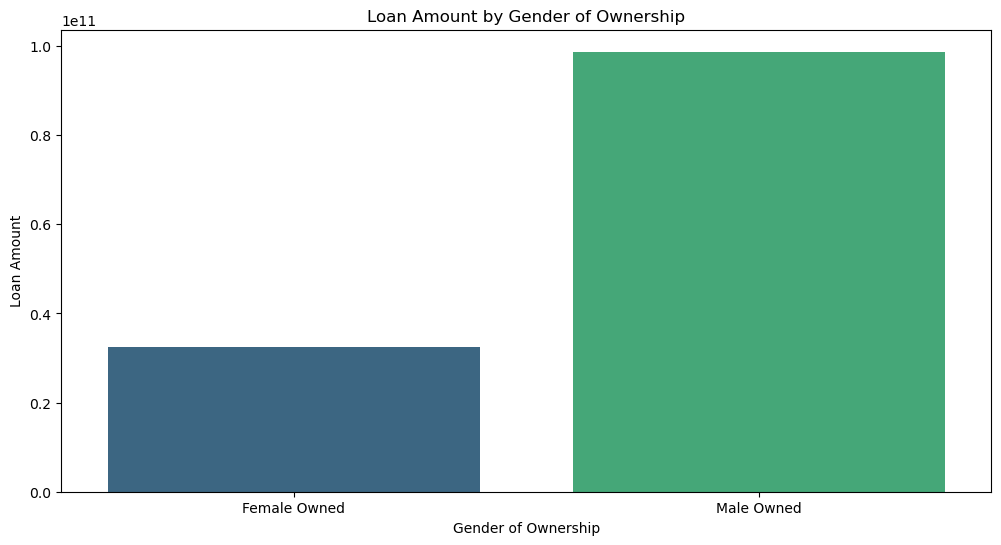

In [311]:
by_gender = df.groupby(by='gender').aggregate({'loan_amount': ['sum']}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=by_gender, x='gender', y=('loan_amount', 'sum'), palette='viridis')

plt.xlabel('Gender of Ownership')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Gender of Ownership')

plt.show()

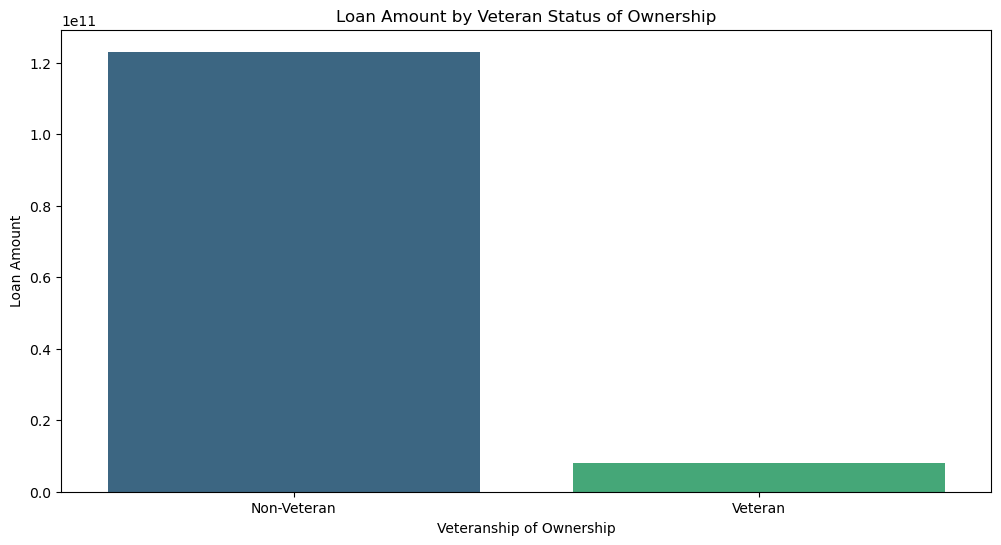

In [312]:
by_veteranship = df.groupby(by='veteran').aggregate({'loan_amount': ['sum']}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=by_veteranship, x='veteran', y=('loan_amount', 'sum'), palette='viridis')

plt.xlabel('Veteranship of Ownership')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Veteran Status of Ownership')

plt.show()

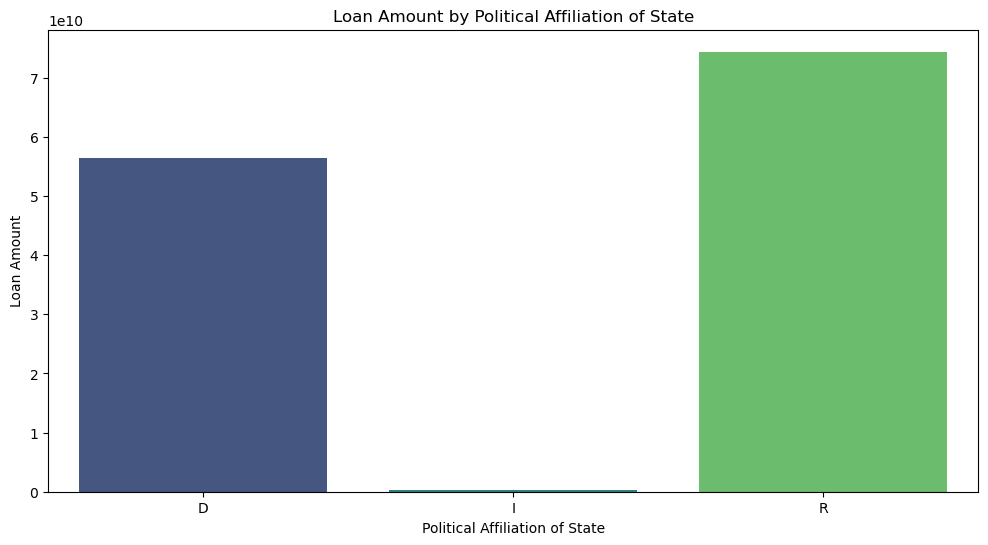

In [313]:
by_affiliation = df.groupby(by='affiliation').aggregate({'loan_amount': ['sum']}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=by_affiliation, x='affiliation', y=('loan_amount', 'sum'), palette='viridis')

plt.xlabel('Political Affiliation of State')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Political Affiliation of State')

plt.show()

C:\Users\Peti\AppData\Local\Temp\ipykernel_4464\1856510643.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



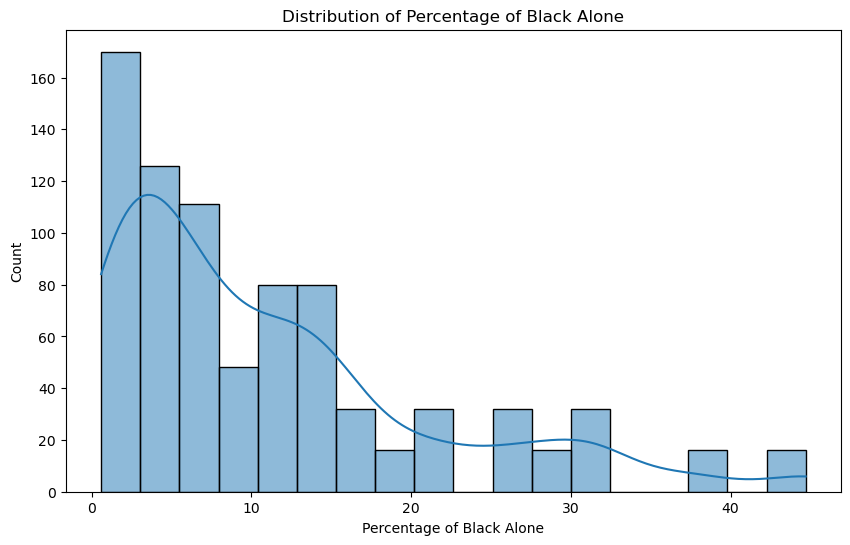

In [369]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='pct_black_alone', kde=True,palette='viridis')
plt.xlabel('Percentage of Black Alone')
plt.ylabel('Count')
plt.title('Distribution of Percentage of Black Alone')
plt.show()

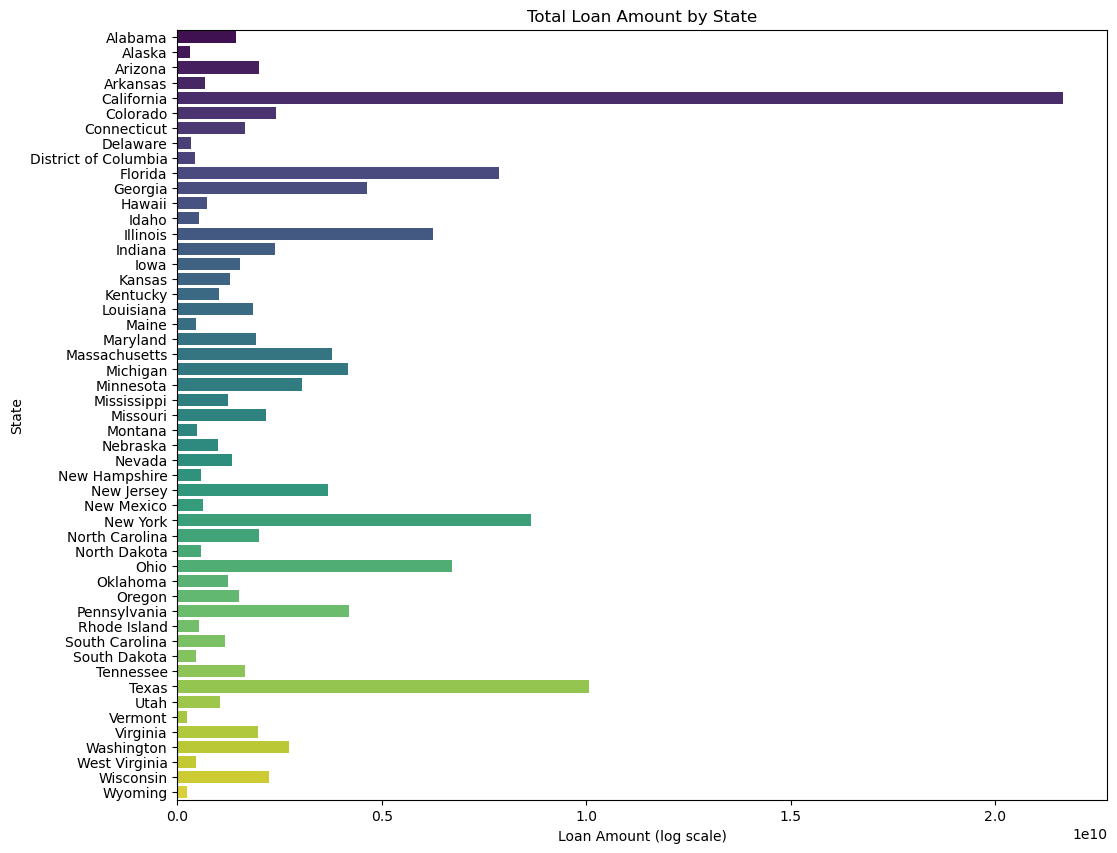

In [314]:
by_state = df.groupby(by='geo_name').aggregate({'loan_amount': ['sum']}).reset_index()

plt.figure(figsize=(12, 10))

# Create the barplot
sns.barplot(data=by_state, y='geo_name', x=('loan_amount', 'sum'),
            
            orient='h',
            palette='viridis')

plt.xlabel('Loan Amount (log scale)')
plt.ylabel('State')
plt.title('Total Loan Amount by State')

plt.show()


In [315]:
by_state = df.groupby(by='geo_name').aggregate({'log_loan_amount': ['sum']}).droplevel(0, axis=1).reset_index()

# Create the barplot with continuous color scaling using Plotly Express
fig = px.bar(by_state, 
             x='sum',
             y='geo_name', 
             orientation='h',
             color='sum',  # Use log_loan_amount for continuous color scaling
             color_continuous_scale='viridis',  # Use 'viridis' color scale
             labels={'geo_name': 'State', 'loan_amount': 'Loan Amount (log scale)'},
             title='Total Log Loan Amount by State',
             template ='simple_white')

fig.update_layout(height=1200, width=1000)

fig.show()

In [316]:
# Create the barplot with continuous color scaling using Plotly Express
by_pct_blck = df.groupby(by='geo_name').aggregate({'log_loan_amount': 'sum','pct_black_alone':'mean'}).reset_index()

fig = px.bar(by_pct_blck, 
             x='pct_black_alone',
             y='geo_name', 
             orientation='h',
             color='pct_black_alone',  # Use log_loan_amount for continuous color scaling
             color_continuous_scale='viridis',  # Use 'viridis' color scale
             labels={'geo_name': 'State', 'loan_amount': 'Loan Amount (log scale)'},
             title='Percentage of Black People in the Population by State',
             template ='simple_white')

fig.update_layout(height=1200, width=1000)

fig.show()

In [317]:
# creating dummy variables
# for white owned businesses
df['white_owned'] = df['race_or_ethnicity'].apply(lambda x: 1 if x == 'White' else 0)

# for male owned businesses
df['male_owned'] = df['gender'].apply(lambda x: 1 if x == 'Male Owned' else 0)

# for Non-Veteran owned businesses
df['non-veteran_owned'] = df['veteran'].apply(lambda x: 1 if x == 'Non-Veteran' else 0)

# for Republican states
df['republican'] = df['affiliation'].apply(lambda x: 1 if x == 'R' else 0)

In [318]:
for col in df[['white_owned','male_owned','non-veteran_owned','republican']]:
    print(df[col].value_counts())
    print('-------------------')

0    603
1    204
Name: white_owned, dtype: int64
-------------------
1    405
0    402
Name: male_owned, dtype: int64
-------------------
1    408
0    399
Name: non-veteran_owned, dtype: int64
-------------------
1    504
0    303
Name: republican, dtype: int64
-------------------


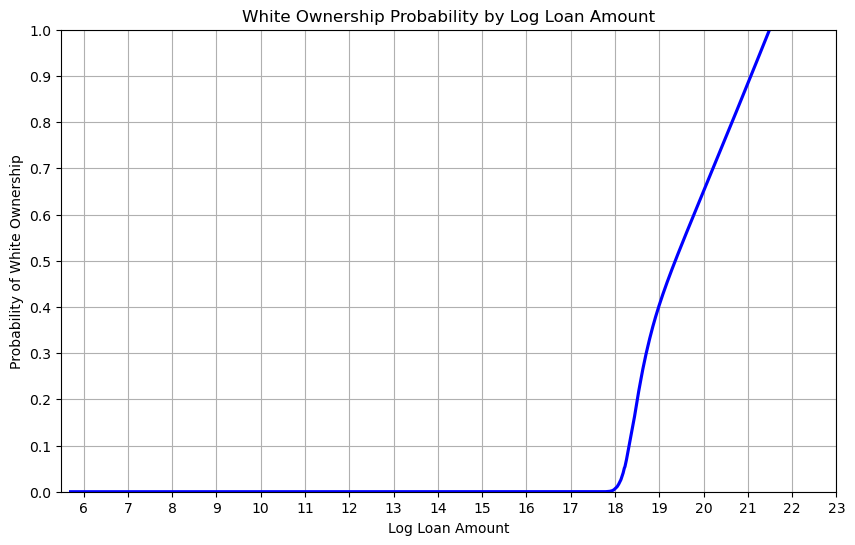

In [319]:
# Create the Seaborn plot
plt.figure(figsize=(10, 6))

# Smoothed line using Seaborn's regplot
sns.regplot(data=df, x='log_loan_amount', y='white_owned', lowess=True, scatter=False, color='blue')

# Set labels and title
plt.xlabel('Log Loan Amount')
plt.ylabel('Probability of White Ownership')
plt.title('White Ownership Probability by Log Loan Amount')

# Set axis limits and ticks
plt.xlim(5.5, 23)  # Adjust based on your data range
plt.ylim(0, 1)  # Assuming white_ownership is between 0 and 1
plt.xticks(np.arange(6, 24, 1))  # Adjust based on your data range
plt.yticks(np.arange(0, 1.1, 0.1))

# Display the plot
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

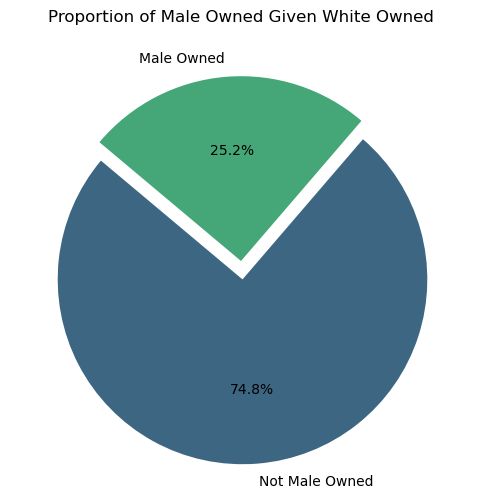

In [321]:
plt.figure(figsize=(8, 6))

# Calculate the proportion of male_owned for each category of white_owned
proportions = df.groupby('white_owned')['male_owned'].sum()

# Create the pie chart with specified labels, colors, and explode
plt.figure(figsize=(8, 6))
plt.pie(proportions,
        labels=['Not Male Owned', 'Male Owned'],
        colors=[(0.2363, 0.3986, 0.5104, 1.0),(0.2719, 0.6549, 0.4705, 1.0)], # get colors from viridis palette
        explode=(0.1, 0),
        autopct='%1.1f%%',
        startangle=140)
plt.title('Proportion of Male Owned Given White Owned')
plt.show()


<Figure size 800x600 with 0 Axes>

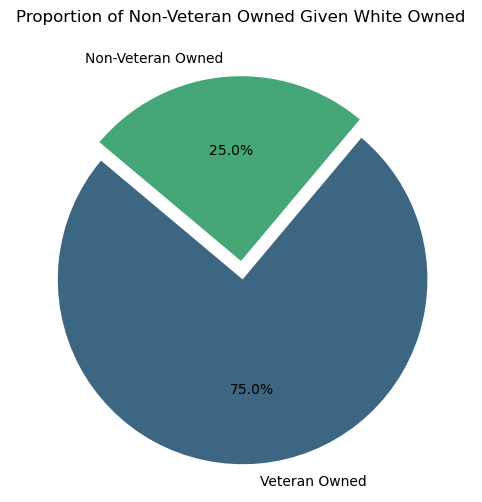

In [339]:
plt.figure(figsize=(8, 6))

# Calculate the proportion of male_owned for each category of white_owned
proportions = df.groupby('white_owned')['non-veteran_owned'].sum()

# Create the pie chart with specified labels, colors, and explode
plt.figure(figsize=(8, 6))
plt.pie(proportions,
        labels=['Veteran Owned', 'Non-Veteran Owned'],
        colors=[(0.2363, 0.3986, 0.5104, 1.0),(0.2719, 0.6549, 0.4705, 1.0)], # get colors from viridis palette
        explode=(0.1, 0),
        autopct='%1.1f%%',
        startangle=140)
plt.title('Proportion of Non-Veteran Owned Given White Owned')
plt.show()


<Figure size 800x600 with 0 Axes>

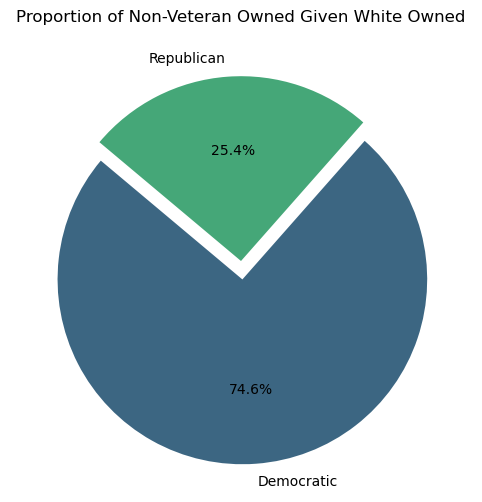

In [348]:
plt.figure(figsize=(8, 6))

# Calculate the proportion of male_owned for each category of white_owned
proportions = df.groupby('white_owned')['republican'].sum()

# Create the pie chart with specified labels, colors, and explode
plt.figure(figsize=(8, 6))
plt.pie(proportions,
        labels=['Democratic', 'Republican'],
        colors=[(0.2363, 0.3986, 0.5104, 1.0),(0.2719, 0.6549, 0.4705, 1.0)], # get colors from viridis palette
        explode=(0.1, 0),
        autopct='%1.1f%%',
        startangle=140)
plt.title('Proportion of Non-Veteran Owned Given White Owned')
plt.show()